In [122]:
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

In [97]:
#base_path = 'C:/GitHub/Data-Analytics-Case-2_LOCAL/data/'
base_path = 'dataRaw/'
# Reading data.csv with consideration for mixed types
dataRaw = pd.read_csv(base_path + 'data.csv', sep=',', low_memory=False)
# Reading holidays_events.csv without specific issues mentioned, but keep an eye for potential encoding errors
holidays_events = pd.read_csv(base_path + 'holidays_events(India).csv', sep=';')
# Reading items.csv with consideration for mixed types
items = pd.read_csv(base_path + 'items.csv', sep=';', low_memory=False)
# Reading oil.csv, noting there might be lines with missing data (';;')
oilRaw = pd.read_csv(base_path + 'oil(India).csv', sep=',', skipinitialspace=True)
# Reading stores.csv with specified encoding to address potential UnicodeDecodeError
stores = pd.read_csv(base_path + 'stores.csv', sep=';', encoding='ISO-8859-1')
# Reading test.csv without specific issues mentioned
testRaw = pd.read_csv(base_path + 'test.csv', sep=',')
# Reading transactions.csv without specific issues mentioned
transactions = pd.read_csv(base_path + 'transactions.csv', sep=',')


Start with TEST visualization
-> statistical analysis of numerical data regarding outliers

          id        date  store_nbr  item_nbr  onpromotion
0  125497040  2017-08-16          1     96995        False
1  125497041  2017-08-16          1     99197        False
2  125497042  2017-08-16          1    103501        False
3  125497043  2017-08-16          1    103520        False
4  125497044  2017-08-16          1    103665        False
Original DataFrame shape: (3370464, 5)
DataFrame shape after removing outliers: (3370464, 5)


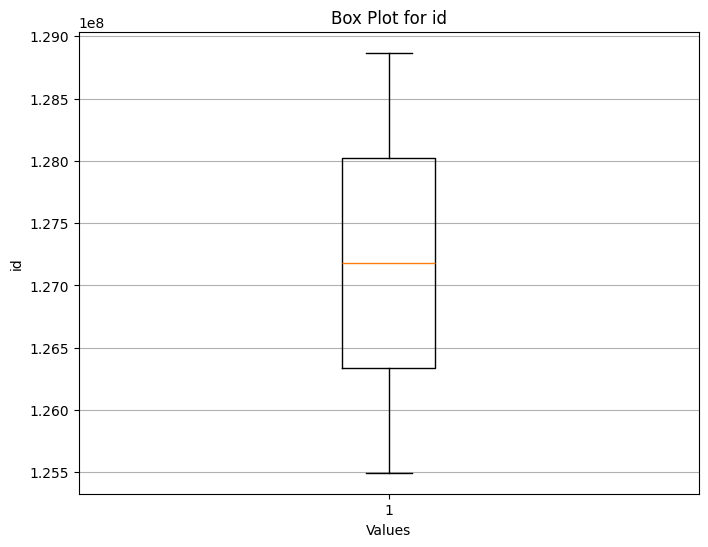

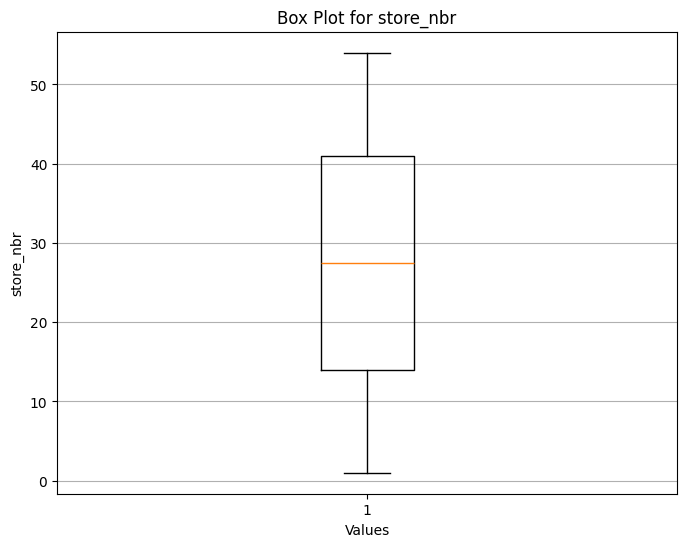

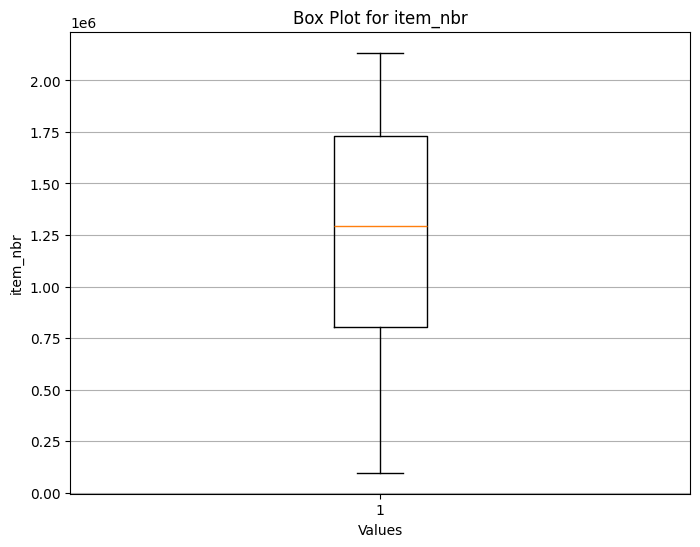

In [98]:
# Notes:
# 1. For files like 'oil(India).csv' where there are potential empty fields (';;'), skipinitialspace=True helps clean up any leading spaces after the separator, which might help in correctly parsing the fields.
# 2. If any of these files still present challenges, consider specifying dtype for columns with mixed types, or exploring the files manually to identify further specific needs (like missing values handling, encoding, etc.).
print(testRaw.head())
test = testRaw.copy()
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d')

# Assuming 'test' is your DataFrame
# Select only the numeric columns (excluding 'date' and 'onpromotion')
numeric_columns = ['id', 'store_nbr', 'item_nbr']

# Calculate the IQR for each numeric column
Q1 = test[numeric_columns].quantile(0.25)
Q3 = test[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outlier indices using Boolean arrays
outlier_indices = ((test[numeric_columns] < (Q1 - 1.5 * IQR)) | (test[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Create a new DataFrame without outliers
df_no_outliers = test[~outlier_indices]

print("Original DataFrame shape:", test.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

# Create a separate box plot for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(test[col])
    plt.title(f"Box Plot for {col}")
    plt.xlabel("Values")
    plt.ylabel(col)
    plt.grid(axis='y')
    plt.show()



TEST visualization
-> consistancy of the dataset

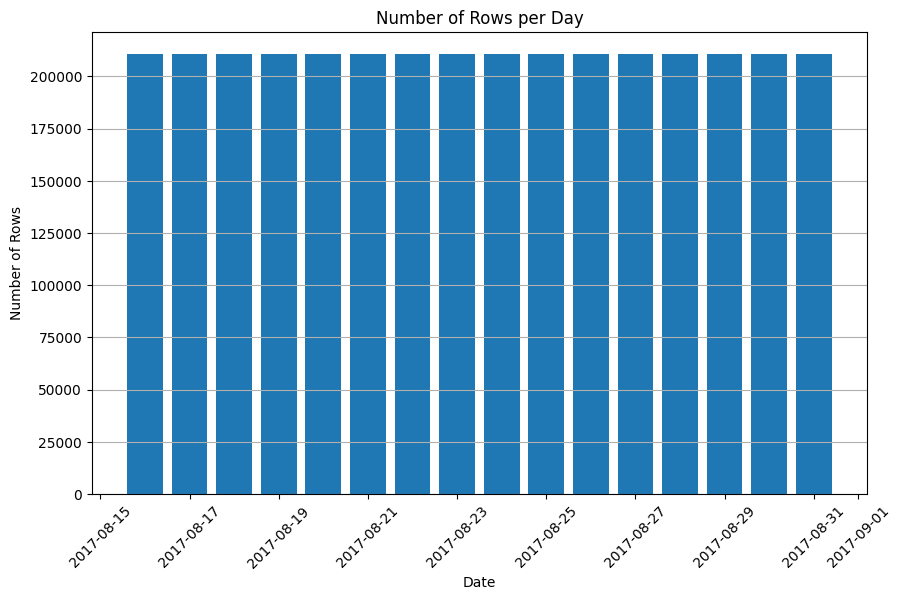

In [99]:
# Group by date and count the number of rows per day
daily_counts = test.groupby(test['date'].dt.date).size()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(daily_counts.index, daily_counts.values) # type: ignore
plt.title("Number of Rows per Day")
plt.xlabel("Date")
plt.ylabel("Number of Rows")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y')
plt.show()

TEST visualization
-> what is on promotion?

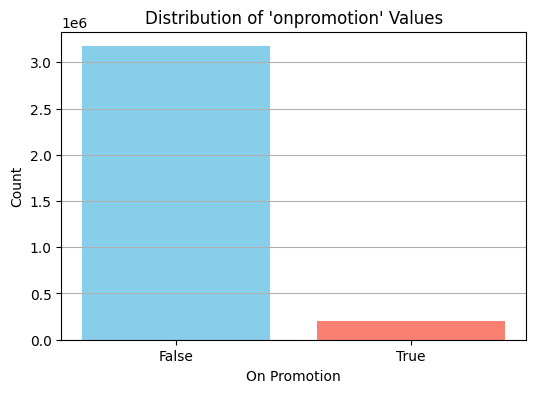

onpromotion
False    3171867
True      198597
Name: count, dtype: int64


In [100]:
# Create a count of True and False values
promotion_counts = test['onpromotion'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(promotion_counts.index, promotion_counts.values, color=['skyblue', 'salmon']) # type: ignore
plt.title("Distribution of 'onpromotion' Values")
plt.xlabel("On Promotion")
plt.ylabel("Count")
plt.xticks([0, 1], ['False', 'True'])  # Set x-axis labels
plt.grid(axis='y')
plt.show()

print(promotion_counts)

Continue with DATA visualization
-> evolution of the amount of sales

   Unnamed: 0   id        date  store_nbr  item_nbr  unit_sales onpromotion
0           0    0  2013-01-01         25    103665         7.0         NaN
1          60   60  2013-01-01         25    214381         5.0         NaN
2         120  120  2013-01-01         25    315179         4.0         NaN
3         180  180  2013-01-01         25    414752         1.0         NaN
4         240  240  2013-01-01         25    557408         3.0         NaN


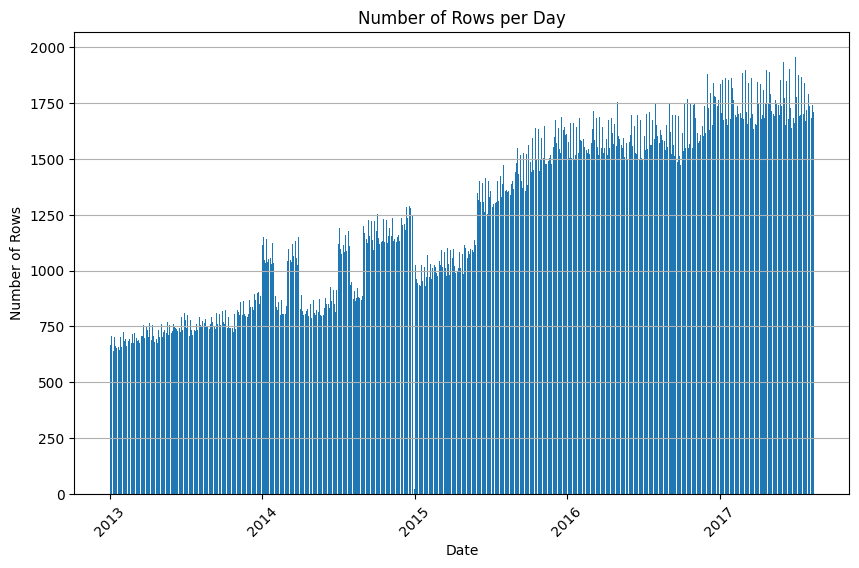

In [101]:
print(dataRaw.head())

data = dataRaw.copy()
data['date'] = pd.to_datetime(dataRaw['date'], format='%Y-%m-%d')
data['unit_sales'] = dataRaw['unit_sales'].round(2)

# Group by date and count the number of rows per day
daily_counts = data.groupby(data['date'].dt.date).size()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(daily_counts.index, daily_counts.values) # type: ignore
plt.title("Number of Rows per Day")
plt.xlabel("Date")
plt.ylabel("Number of Rows")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y')
plt.show()

Continue with DATA visualization
-> evolution of the amount of sales (better visualization)

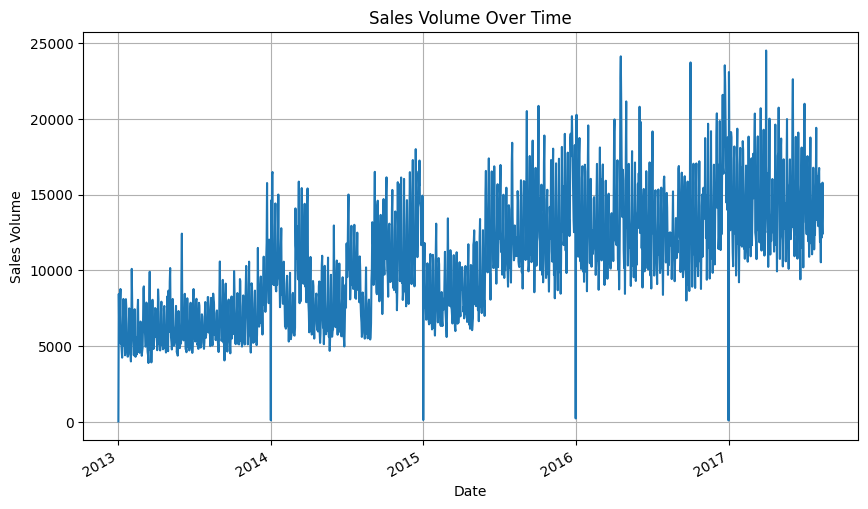

In [102]:
# Group by date and sum the unit_sales
sales_over_time = data.groupby('date')['unit_sales'].sum()

# Create the line chart
sales_over_time.plot(kind='line', figsize=(10, 6))
plt.title('Sales Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.show()



Continue with DATA visualization
-> sales distribution acros stores

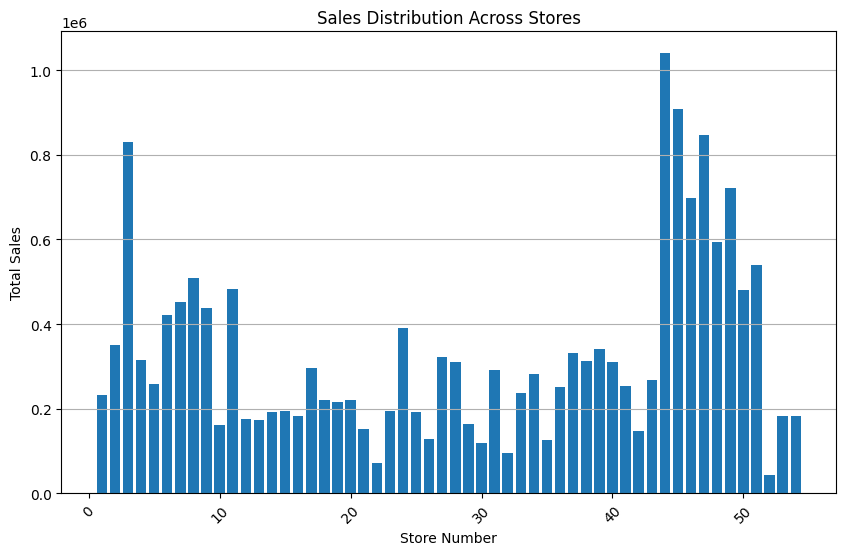

store nr 44 has the highest sales


In [103]:
# Group by store_nbr and sum the unit_sales
sales_by_store = data.groupby('store_nbr')['unit_sales'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sales_by_store.index, sales_by_store.values) # type: ignore
plt.title('Sales Distribution Across Stores')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print("store nr 44 has the highest sales")

Continue with DATA visualization
-> sales distribution acros items

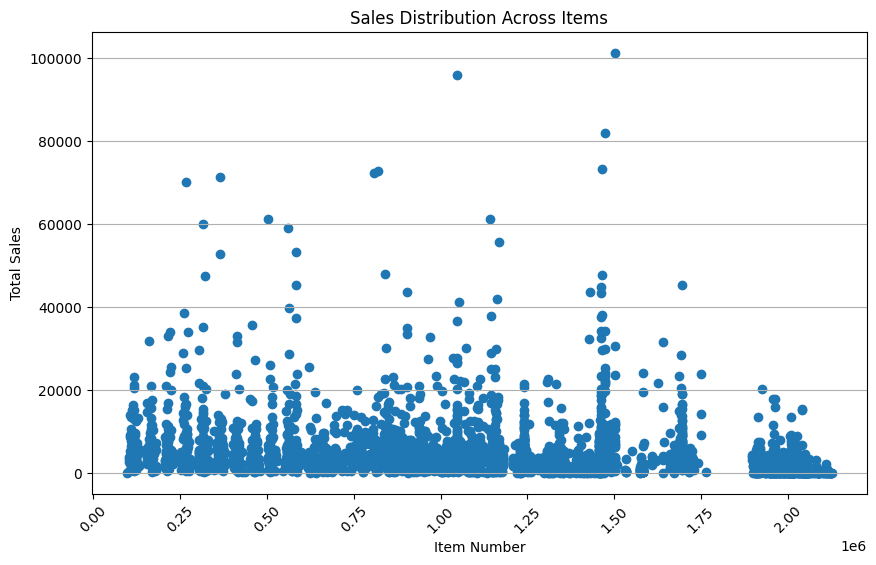

we can see that the store is closed or some periods of time


In [104]:
# Group by item_nbr and sum the unit_sales
sales_by_item = data.groupby('item_nbr')['unit_sales'].sum()

# Sort the sales in descending order
sales_by_item = sales_by_item.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.scatter(sales_by_item.index, sales_by_item.values) # type: ignore
plt.title('Sales Distribution Across Items')
plt.xlabel('Item Number')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print("we can see that the store is closed or some periods of time")

Continue with DATA visualization
-> negative sales, items that are returned

In [105]:
data.info()
data['unit_sales'].describe()

print("Er zijn 138 items geretourneerd naar de winkels waardoor de unit_sales negatief zijn")
negative_sales = data[data['unit_sales'] < 0]
negative_sales.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091618 entries, 0 to 2091617
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Unnamed: 0   int64         
 1   id           int64         
 2   date         datetime64[ns]
 3   store_nbr    int64         
 4   item_nbr     int64         
 5   unit_sales   float64       
 6   onpromotion  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 111.7+ MB
Er zijn 138 items geretourneerd naar de winkels waardoor de unit_sales negatief zijn


,Unnamed: 0,id,date,store_nbr,item_nbr,unit_sales
count,1.380000e+02,1.380000e+02,138,138.000000,1.380000e+02,138.000000
mean,6.540077e+07,6.540077e+07,2015-10-19 06:26:05.217391360,24.065217,1.107218e+06,-8.280000
min,3.982800e+05,3.982800e+05,2013-01-11 00:00:00,1.000000,1.035200e+05,-300.000000
25%,3.343184e+07,3.343184e+07,2014-10-20 06:00:00,8.000000,6.836718e+05,-3.000000
50%,6.844281e+07,6.844281e+07,2016-01-22 12:00:00,20.000000,1.169343e+06,-1.000000
75%,9.657078e+07,9.657078e+07,2016-11-11 00:00:00,41.000000,1.464239e+06,-1.000000
max,1.232944e+08,1.232944e+08,2017-07-25 00:00:00,54.000000,2.045493e+06,-0.820000
std,3.582318e+07,3.582318e+07,NaN,17.080833,5.370882e+05,32.312752


meeste van de producten die geretourneerd zijn hebben een unit_sales van -1
dat betekend dat er meestal 1 product is geretourneerd


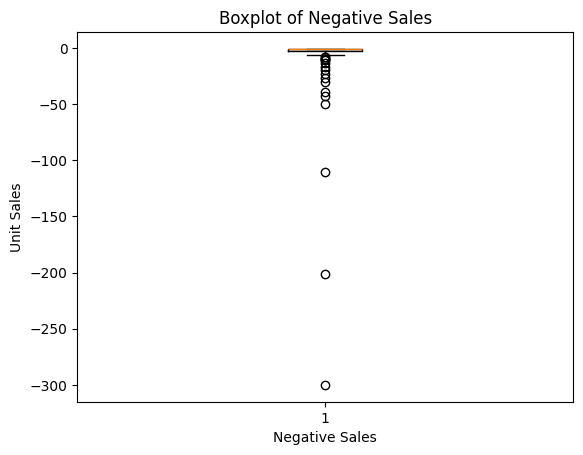

In [106]:
print("meeste van de producten die geretourneerd zijn hebben een unit_sales van -1")
print("dat betekend dat er meestal 1 product is geretourneerd")

plt.boxplot(negative_sales['unit_sales'])
plt.xlabel('Negative Sales')
plt.ylabel('Unit Sales')
plt.title('Boxplot of Negative Sales')
plt.show()


In [107]:
print(data['onpromotion'].value_counts())
print(data['onpromotion'].isna().sum())
data['onpromotion'].fillna(False, inplace=True)
print(data['onpromotion'].value_counts())

print('\n',"hoe veel producten die geretourneerd zijn, zijn niet in promotie?")
tmp = negative_sales[negative_sales['onpromotion']==False]
print(len(tmp))
print("er zijn dus geen producten die geretourneerd zijn die in promotie zijn")


onpromotion
False    1600428
True      130229
Name: count, dtype: int64
360961
onpromotion
False    1961389
True      130229
Name: count, dtype: int64

 hoe veel producten die geretourneerd zijn, zijn niet in promotie?
115
er zijn dus geen producten die geretourneerd zijn die in promotie zijn


C:\Users\Cursist\AppData\Local\Temp\ipykernel_20300\2675545743.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['onpromotion'].fillna(False, inplace=True)
C:\Users\Cursist\AppData\Local\Temp\ipykernel_20300\2675545743.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['onpromotion'].fillna(False, 

Continue with ITEMS visualization
-> explore

In [115]:
items.info()
items = items.dropna()
try:
    items['item_nbr'] = items['item_nbr'].astype(int)
except:
    pass
items['Price'] = items['Price'].round(2)


<class 'pandas.core.frame.DataFrame'>
Index: 4100 entries, 121964 to 1247036
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   family      4100 non-null   object 
 1   class       4100 non-null   float64
 2   perishable  4100 non-null   float64
 3   Price       4100 non-null   float64
dtypes: float64(3), object(1)
memory usage: 144.1+ KB


In [116]:
items.describe()

,class,perishable,Price
count,4100.0000,4100.000000,4100.000000
mean,2169.6500,0.240488,10.126515
std,1484.9109,0.427432,15.475591
min,1002.0000,0.000000,0.010000
25%,1068.0000,0.000000,4.040000
50%,2004.0000,0.000000,7.080000
75%,2990.5000,0.000000,11.320000
max,7780.0000,1.000000,240.620000


In [ ]:
items['perishable'] = items['perishable'].map({0: False, 1: True})

""" fig = go.Figure(data=[go.Pie(labels=items.index, values=items['Price'], hole=0.3, marker=dict(colors=items['Price'], line=dict(color='#000000', width=2)))])
fig.update_layout(title='Pie Chart with Different Radius According to Price')
fig.show() """

# print("visualize the family column using a sunburst pie chart")
# fig = px.sunburst(items, path=['family'], title='Family Distribution')
# fig.show()

Continue with OIL visualization
-> analyze file, seprate data

In [59]:

# Create a mask to filter rows with '%' in the 'dcoilwtico;;' column
mask = oilRaw['dcoilwtico;;'].str.contains('%')

# Filter the rows using the mask and create the 'oilExtra' dataframe
oilExtra = oilRaw[mask].copy()

# Delete the rows from the 'oil' dataframe that were moved to 'oilExtra'
oil = oilRaw[~mask].copy()

# Reset the index of the 'oil' dataframe
oil.reset_index(drop=True, inplace=True)

# Replace "." with ","
oil['dcoilwtico;;'] = oil['dcoilwtico;;'].str.replace(';', '')
#oil['dcoilwtico;;'] = oil['dcoilwtico;;'].str.replace('.', ',')

# Drop rows with missing values or spaces in the 'dcoilwtico' column
oil['dcoilwtico;;'] = oil['dcoilwtico;;'].apply(lambda x: x.strip())
oil.dropna(subset=['dcoilwtico;;'], inplace=True)
oil = oil[~(oil['dcoilwtico;;'] == '')]

# Convert the 'dcoilwtico' column to float and round to 2 decimal places
try:
    oil['dcoilwtico;;'] = oil['dcoilwtico;;'].astype(float).round(2)
except:
    oil.dropna(subset=['dcoilwtico;;'], inplace=True)

# Delete the ";"
oil.rename(columns={'dcoilwtico;;': 'dcoilwtico'}, inplace=True)


Continue with OIL visualization
-> relation crude oil price over time

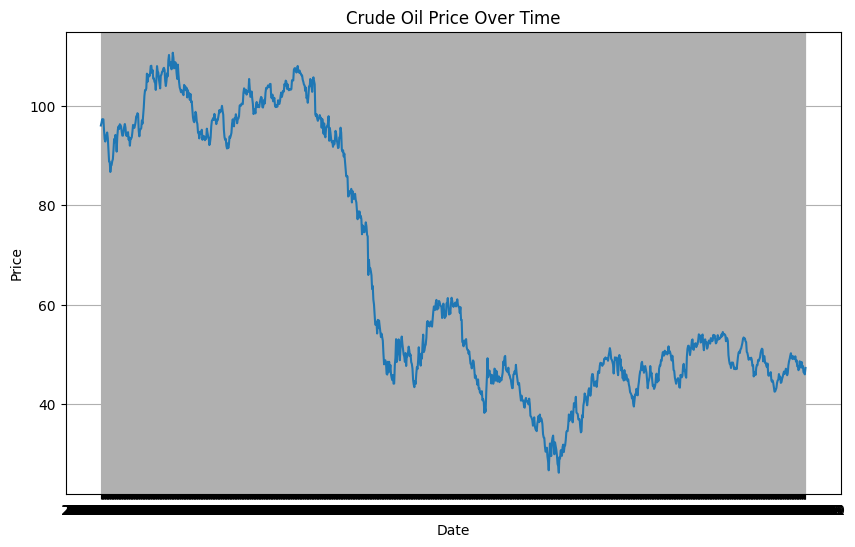

In [60]:

# Plot the oil prices over time
plt.figure(figsize=(10, 6))
plt.plot(oil['date'], oil['dcoilwtico'])
plt.title('Crude Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
# Set the x-axis locator and formatter
ax = plt.gca()

# EXTRA: Set the locator to every year - werkt nu nog niet
""" mylocator = mdates.YearLocator()
ax.xaxis.set_major_locator(mylocator)
# Use ConciseDateFormatter to format the dates
formatter = mdates.ConciseDateFormatter(locator=mylocator)
ax.xaxis.set_major_formatter(formatter) """

plt.show()

Continue with OIL visualization
-> statistical analysis of the oil price

In [61]:
# Print the 'oil' dataframe
print(oil)
oil['dcoilwtico'].describe()

            date  dcoilwtico
0     2013-03-26       95.99
1     2013-03-27       96.53
2     2013-03-28       97.24
4     2013-04-01       97.10
5     2013-04-02       97.23
...          ...         ...
1153  2017-08-25       47.65
1154  2017-08-28       46.40
1155  2017-08-29       46.46
1156  2017-08-30       45.96
1157  2017-08-31       47.26

[1118 rows x 2 columns]


count    1118.000000
mean       66.363694
std        25.545869
min        26.190000
25%        46.180000
50%        52.375000
75%        95.530000
max       110.620000
Name: dcoilwtico, dtype: float64

In [ ]:
print(holidays_events.head())


In [ ]:
print(items.head())
print(stores.head())
print(transactions.head())